In [44]:
from pathlib import Path  
from matplotlib import pyplot as plot
from pathlib import Path  
import pandas as pandas
import numpy as numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [45]:
dataframe = pandas.read_csv("dataset.csv").dropna()
dataframe["date"] = pandas.to_datetime(dataframe['date'], format='%Y-%m-%d %H:%M:%S')
dataframe["NSM"] = (dataframe["date"] - pandas.to_datetime(dataframe['date'].dt.date, format='%Y-%m-%d')).dt.total_seconds()
dataframe["week_status"] = dataframe["date"].apply(lambda date: 1 if(date.weekday() <= 4) else 0)
dataframe["day_of_monday"] = dataframe["date"].apply(lambda date: date.weekday() == 0)
dataframe["day_of_tuesday"] = dataframe["date"].apply(lambda date: date.weekday() == 1)
dataframe["day_of_wednesday"] = dataframe["date"].apply(lambda date: date.weekday() == 2)
dataframe["day_of_thursday"] = dataframe["date"].apply(lambda date: date.weekday() == 3)
dataframe["day_of_friday"] = dataframe["date"].apply(lambda date: date.weekday() == 4)
dataframe["day_of_saturday"] = dataframe["date"].apply(lambda date: date.weekday() == 5)
dataframe["day_of_sunday"] = dataframe["date"].apply(lambda date: date.weekday() == 6)
dataframe = dataframe.drop("date", axis = 1).dropna()
dataframe.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv2,NSM,week_status,day_of_monday,day_of_tuesday,day_of_wednesday,day_of_thursday,day_of_friday,day_of_saturday,day_of_sunday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,13.275433,61200.0,1,True,False,False,False,False,False,False
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.606195,61800.0,1,True,False,False,False,False,False,False
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,28.642668,62400.0,1,True,False,False,False,False,False,False
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.410389,63000.0,1,True,False,False,False,False,False,False
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,10.084097,63600.0,1,True,False,False,False,False,False,False


In [46]:
X = dataframe.drop("Appliances", axis = 1)
y = dataframe["Appliances"]
TEST_SIZE_RATIO = 0.20
RANDOM_STATE_SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE_RATIO, random_state=RANDOM_STATE_SEED)

In [47]:
rfr_metrics_dataset_PATH = Path("./rfr_metrics_dataset.csv")
if not (rfr_metrics_dataset_PATH.exists() and rfr_metrics_dataset_PATH.is_file()):
    N_ESTIMATORS_SET = range(1, 200 + 1)
    performance = {}
    for n_estimators in N_ESTIMATORS_SET:
        print("\nTraining Random Forest Regression Model for n_estimators: %d" %n_estimators)
        # Applying Random Forest Regression model to the dataset.
        # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
        random_forest_regressor = RandomForestRegressor(n_estimators = n_estimators, n_jobs = -1, random_state=1, verbose = 0)
        random_forest_regressor.fit(X_train, y_train)

        # Calculate the metrics for the model.
        # Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
        y_pred = random_forest_regressor.predict(X)
        performance[n_estimators] = {
            "root_mean_square_error": mean_squared_error(y, y_pred, squared=False),
            "r2_score": r2_score(y, y_pred),
            "mean_absolute_error": mean_absolute_error(y, y_pred),
            "mean_absolute_percentage_error": mean_absolute_percentage_error(y, y_pred)
        }
    
    # Save the calculated metrics of the Random Forest Regression Model into the csv.
    csv_string = "\"n_estimators\",\"root_mean_square_error\",\"r2_score\",\"mean_absolute_error\",\"mean_absolute_percentage_error\""
    for n_estimators in performance.keys():
        csv_string = csv_string + "\n" + str(n_estimators) + "," + str(performance[n_estimators]["root_mean_square_error"]) + "," + str(performance[n_estimators]["r2_score"]) + "," + str(performance[n_estimators]["mean_absolute_error"]) + "," + str(performance[n_estimators]["mean_absolute_percentage_error"])
    random_forest_regression_metrics_dataset = open(rfr_metrics_dataset_PATH.name, "w")
    random_forest_regression_metrics_dataset.write(csv_string)
    random_forest_regression_metrics_dataset.close()

    # Save the importance of the feature w.r.t the most important feature and store the data into csv.
    # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_
    RFR_RELEATIVE_FEATURE_IMPORTANCE_DATASET_PATH = Path("./RFR_releative_feature_importance_dataset.csv")
    feature_importance = random_forest_regressor.feature_importances_
    releative_feature_importance = (feature_importance / feature_importance.max()) * 100
    sorted_indices=numpy.argsort(releative_feature_importance)
    pandas.DataFrame(data = {"feature_names": X.columns[sorted_indices], "releative_feature_importance": releative_feature_importance[sorted_indices], "feature_importance": feature_importance[sorted_indices]}).to_csv(RFR_RELEATIVE_FEATURE_IMPORTANCE_DATASET_PATH.name)


Training Random Forest Regression Model for n_estimators: 1

Training Random Forest Regression Model for n_estimators: 2

Training Random Forest Regression Model for n_estimators: 3

Training Random Forest Regression Model for n_estimators: 4

Training Random Forest Regression Model for n_estimators: 5

Training Random Forest Regression Model for n_estimators: 6

Training Random Forest Regression Model for n_estimators: 7

Training Random Forest Regression Model for n_estimators: 8

Training Random Forest Regression Model for n_estimators: 9

Training Random Forest Regression Model for n_estimators: 10

Training Random Forest Regression Model for n_estimators: 11

Training Random Forest Regression Model for n_estimators: 12

Training Random Forest Regression Model for n_estimators: 13

Training Random Forest Regression Model for n_estimators: 14

Training Random Forest Regression Model for n_estimators: 15

Training Random Forest Regression Model for n_estimators: 16

Training Random 

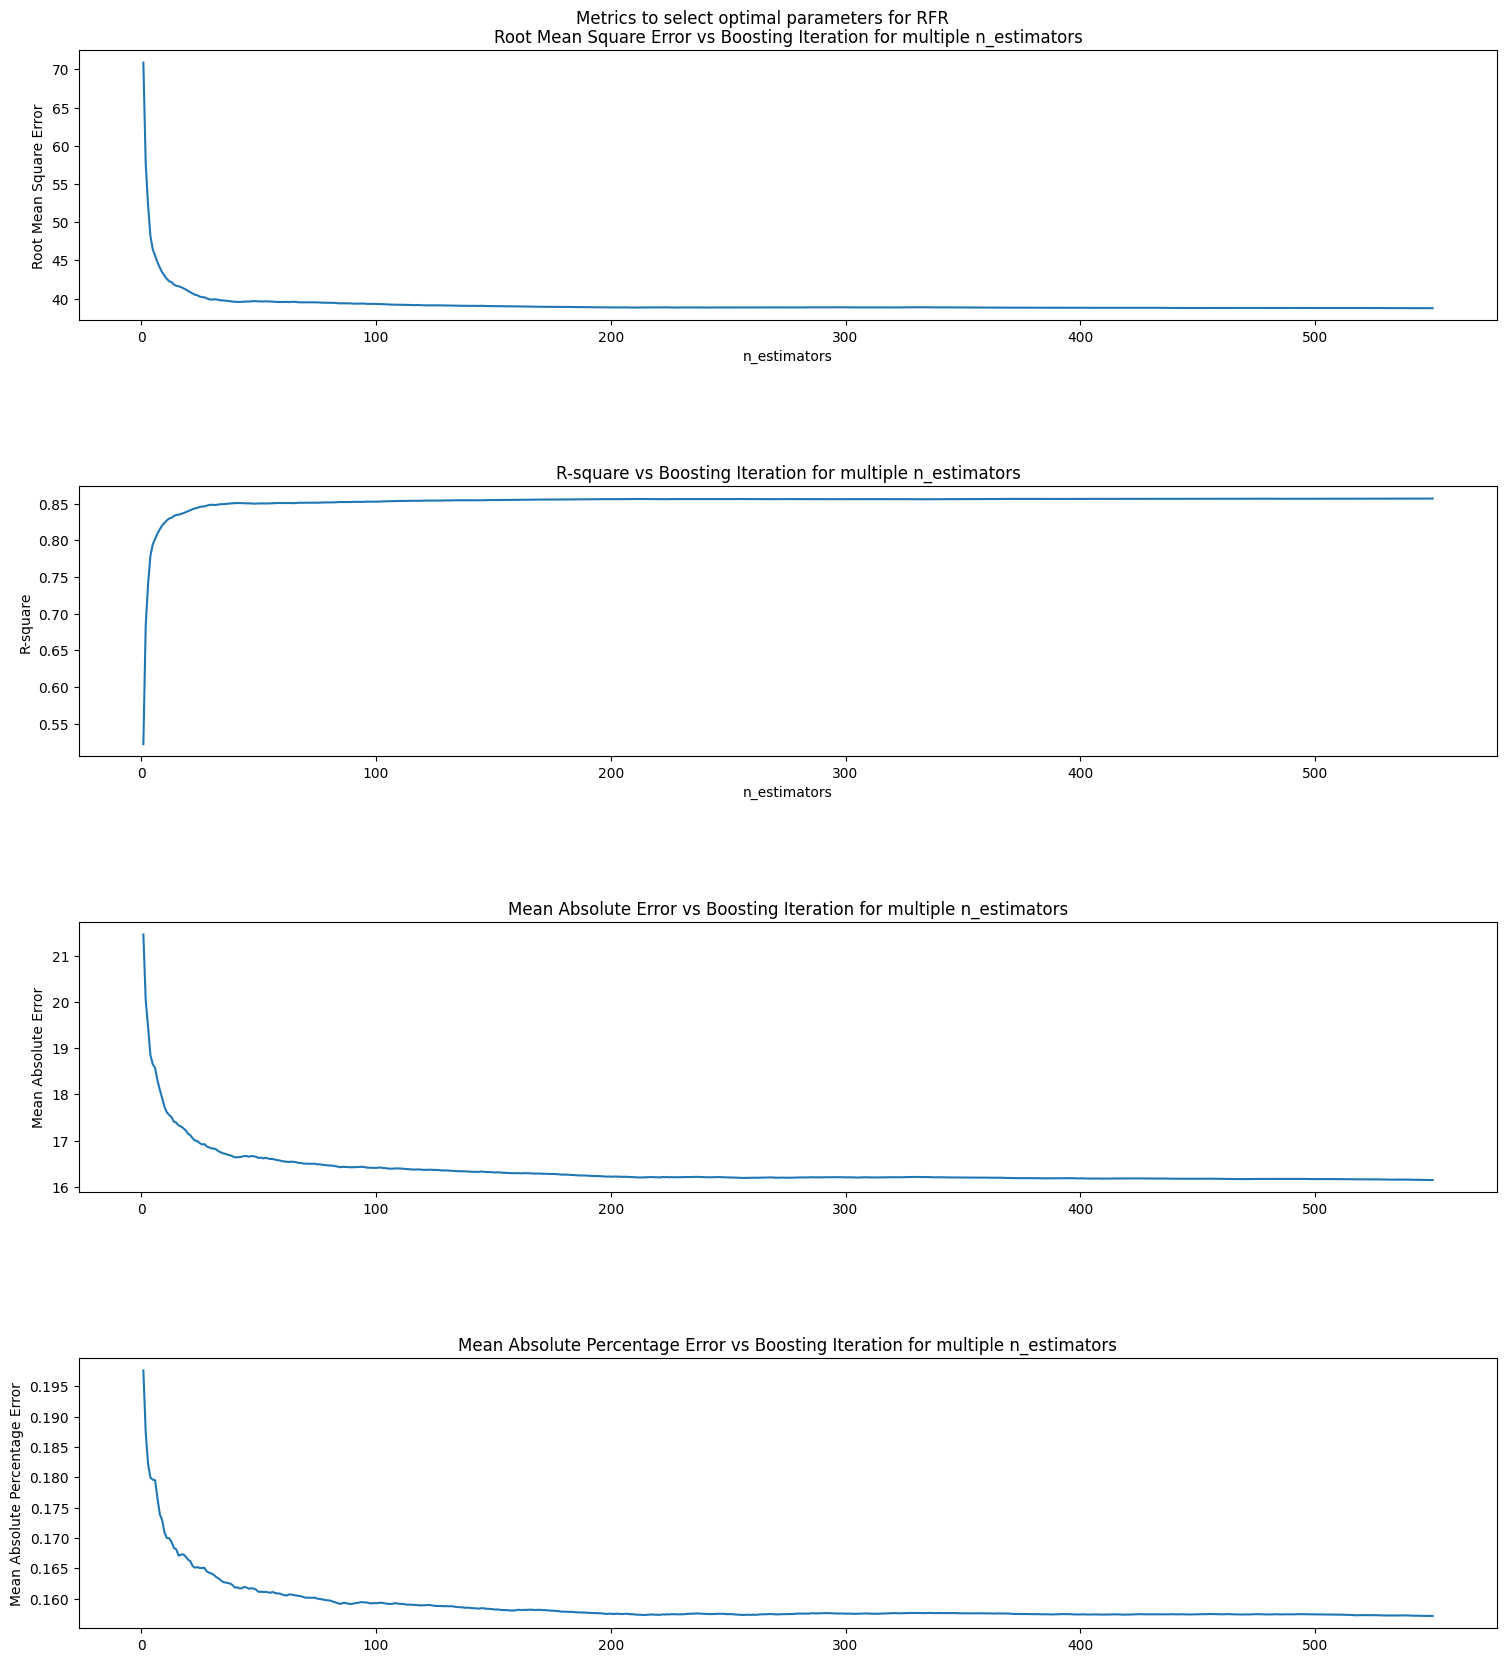

In [48]:
# Visualize model's metrics using line graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
rfr_metrics = pandas.read_csv(rfr_metrics_dataset_PATH.name)
figure, (plot1, plot2, plot3, plot4) = plot.subplots(4)
plot.tight_layout()

plot1.set_title("Root Mean Square Error vs Boosting Iteration for multiple n_estimators")
plot1.set_xlabel('n_estimators')
plot1.set_ylabel('Root Mean Square Error')
plot1.plot(rfr_metrics["n_estimators"], rfr_metrics["root_mean_square_error"])

plot2.set_title("R-square vs Boosting Iteration for multiple n_estimators")
plot2.set_xlabel('n_estimators')
plot2.set_ylabel('R-square')
plot2.plot(rfr_metrics["n_estimators"], rfr_metrics["r2_score"])


plot3.set_title("Mean Absolute Error vs Boosting Iteration for multiple n_estimators")
plot2.set_xlabel('n_estimators')
plot3.set_ylabel('Mean Absolute Error')
plot3.plot(rfr_metrics["n_estimators"], rfr_metrics["mean_absolute_error"])


plot4.set_title("Mean Absolute Percentage Error vs Boosting Iteration for multiple n_estimators")
plot2.set_xlabel('n_estimators')
plot4.set_ylabel('Mean Absolute Percentage Error')
plot4.plot(rfr_metrics["n_estimators"], rfr_metrics["mean_absolute_percentage_error"])

figure.set_figheight(18)
figure.set_figwidth(16)
figure.suptitle("Metrics to select optimal parameters for RFR")
figure.savefig("rfr_metrics_vs_iteration_for_multiple_n_estimators.png")
figure.show()

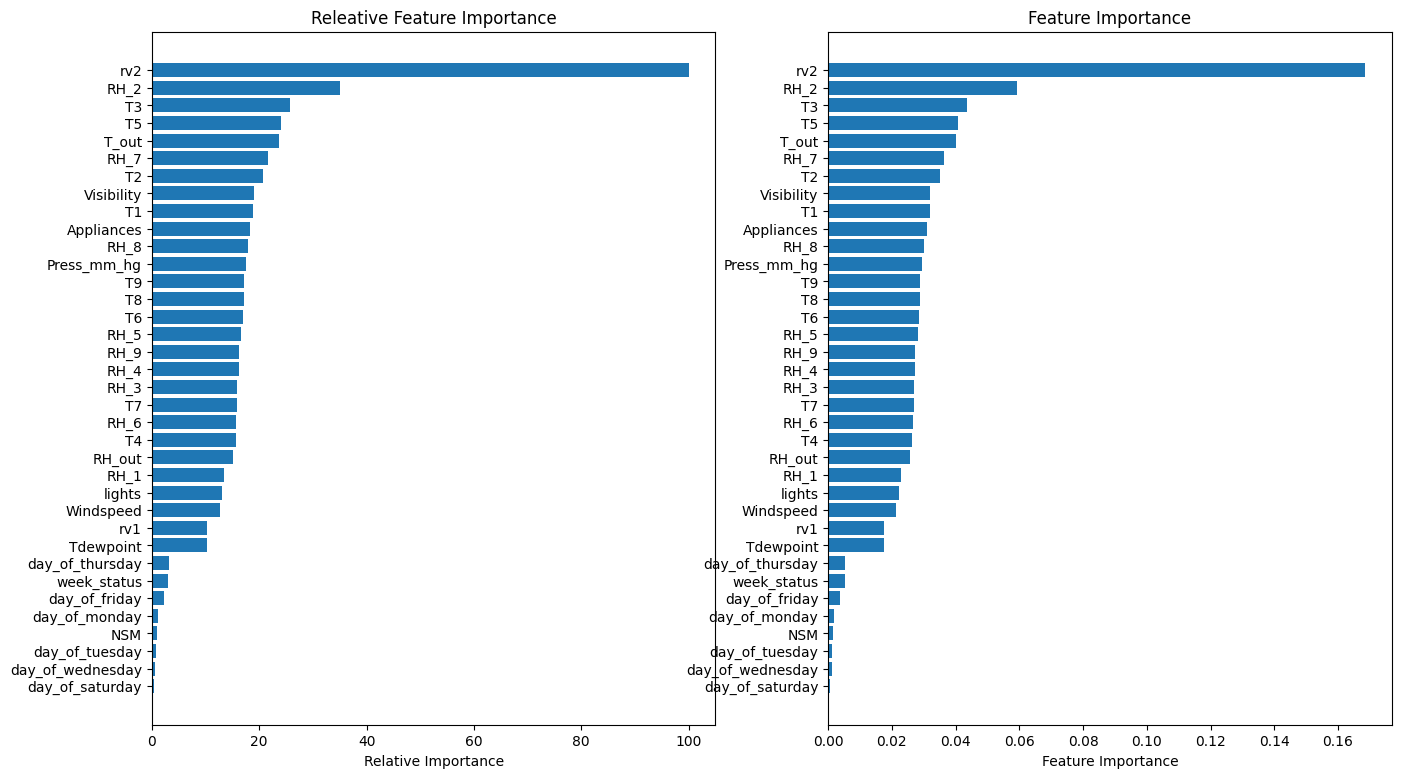

In [49]:
# Visualize feature importance of the model using bar graph subplots.
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
rfr_metrics = pandas.read_csv(RFR_RELEATIVE_FEATURE_IMPORTANCE_DATASET_PATH.name)

figure, (plot1, plot2) = plot.subplots(1, 2)

plot1.barh(rfr_metrics["feature_names"], rfr_metrics["releative_feature_importance"], align="center")
plot1.set_xlabel('Relative Importance')
plot1.set_title('Releative Feature Importance')

plot2.barh(rfr_metrics["feature_names"], rfr_metrics["feature_importance"], align="center")
plot2.set_xlabel('Feature Importance')
plot2.set_title('Feature Importance')

figure.set_figheight(9)
figure.set_figwidth(16)
figure.show()